USA House Prices
Unlocking the Secrets of Real Estate: Analyzing House Prices with Data

Real estate markets are of great importance for both local and international investors. Seattle and Kent are two dynamic markets where economic and social factors have significant impacts on property prices. Below is a detailed description of each feature:

Date: The date when the property was sold. This feature helps in understanding
the temporal trends in property prices.
Price:The sale price of the property in USD. This is the target variable we aim
to predict.
Bedrooms:The number of bedrooms in the property. Generally, properties with
more bedrooms tend to have higher prices.
Bathrooms: The number of bathrooms in the property. Similar to bedrooms,
more bathrooms can increase a property’s value.
Sqft Living: The size of the living area in square feet. Larger living areas are
typically associated with higher property values.
Sqft Lot:The size of the lot in square feet. Larger lots may increase a property’s
desirability and value.
Floors: The number of floors in the property. Properties with multiple floors may
offer more living space and appeal.
Waterfront: A binary indicator (1 if the property has a waterfront view, 0 other-
wise). Properties with waterfront views are often valued higher.
View: An index from 0 to 4 indicating the quality of the property’s view. Better
views are likely to enhance a property’s value.
Condition: An index from 1 to 5 rating the condition of the property. Properties
in better condition are typically worth more.
Sqft Above: The square footage of the property above the basement. This can
help isolate the value contribution of above-ground space.
Sqft Basement: The square footage of the basement. Basements may add value
depending on their usability.
Yr Built: The year the property was built. Older properties may have historical
value, while newer ones may offer modern amenities.
Yr Renovated: The year the property was last renovated. Recent renovations can
increase a property’s appeal and value.
Street: The street address of the property. This feature can be used to analyze
location-specific price trends.
City: The city where the property is located. Different cities have distinct market
dynamics.
Statezip: The state and zip code of the property. This feature provides regional
context for the property.
Country: The country where the property is located. While this dataset focuses
on properties in USA, this feature is included for completeness.

First we Import necessary Libraries 




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor



Download the Data by using Pandas library
Start doing EDA
Check the Data type 

In [2]:
df = pd.read_csv('USA Housing Dataset.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4140 non-null   object 
 1   price          4140 non-null   float64
 2   bedrooms       4140 non-null   float64
 3   bathrooms      4140 non-null   float64
 4   sqft_living    4140 non-null   int64  
 5   sqft_lot       4140 non-null   int64  
 6   floors         4140 non-null   float64
 7   waterfront     4140 non-null   int64  
 8   view           4140 non-null   int64  
 9   condition      4140 non-null   int64  
 10  sqft_above     4140 non-null   int64  
 11  sqft_basement  4140 non-null   int64  
 12  yr_built       4140 non-null   int64  
 13  yr_renovated   4140 non-null   int64  
 14  street         4140 non-null   object 
 15  city           4140 non-null   object 
 16  statezip       4140 non-null   object 
 17  country        4140 non-null   object 
dtypes: float

In [4]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.140000e+03,4140.000000,4140.000000,4140.000000,4.140000e+03,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000
mean,5.530629e+05,3.400483,2.163043,2143.638889,1.469764e+04,1.514130,0.007488,0.246618,3.452415,1831.351449,312.287440,1970.814010,808.368357
std,5.836865e+05,0.903939,0.784733,957.481621,3.587684e+04,0.534941,0.086219,0.790619,0.678533,861.382947,464.349222,29.807941,979.380535
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.200000e+05,3.000000,1.750000,1470.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.600000e+05,3.000000,2.250000,1980.000000,7.676000e+03,1.500000,0.000000,0.000000,3.000000,1600.000000,0.000000,1976.000000,0.000000
75%,6.591250e+05,4.000000,2.500000,2620.000000,1.100000e+04,2.000000,0.000000,0.000000,4.000000,2310.000000,602.500000,1997.000000,1999.000000
max,2.659000e+07,8.000000,6.750000,10040.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,8020.000000,4820.000000,2014.000000,2014.000000


In [5]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

As we see there are no null values and missing values in the data we continue to evaluate our data by featuring Correlation Map for Columns

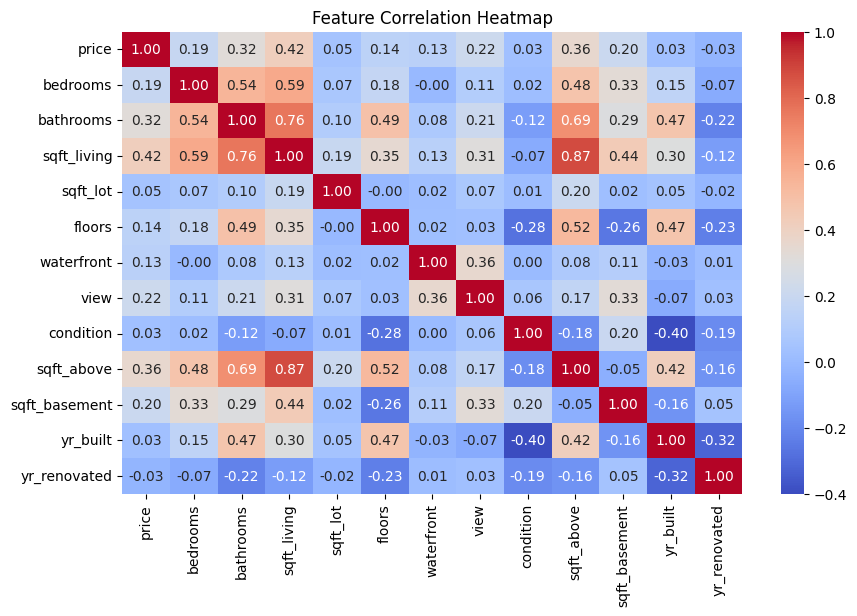

In [6]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
Let's do some feature engineering here 
Visualizing the features in the data


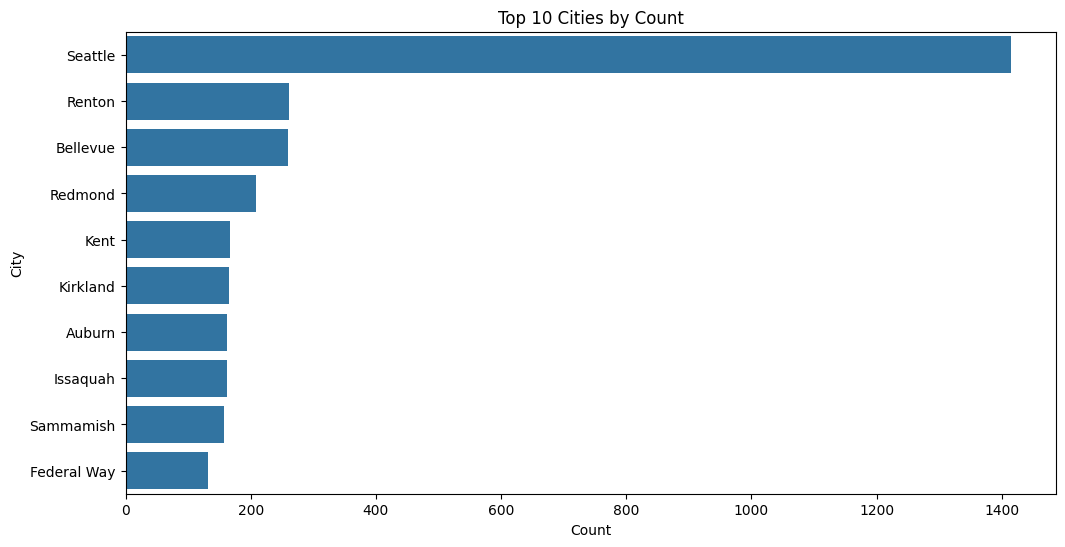

In [7]:
# Visualize top 10 cities
plt.figure(figsize=(12, 6))
top_cities = df['city'].value_counts().nlargest(10)
sns.barplot(x=top_cities.values, y=top_cities.index)
plt.title("Top 10 Cities by Count")
plt.xlabel("Count")
plt.ylabel("City")
plt.show()

Sort out Unique Values in the columns for extracting information about the types of Houses

In [8]:
print("Unique values in 'waterfront':", df['waterfront'].unique())
print("Unique values in 'view':", df['view'].unique())
print("Unique values in 'condition':", df['condition'].unique())


Unique values in 'waterfront': [0 1]
Unique values in 'view': [0 4 1 2 3]
Unique values in 'condition': [3 5 4 2 1]


Find out the Prices of houses whose value are equal to 0 means they are sold out

In [21]:
price_filter = df["price"]== 0
price_zero = df[price_filter]
price_zero.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
3894,0.0,3.0,1.75,1490,10125,1.0,0,0,4,1490,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3896,0.0,4.0,2.75,2600,5390,1.0,0,0,4,1300,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3897,0.0,6.0,2.75,3200,9200,1.0,0,2,4,1600,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3898,0.0,5.0,3.50,3480,36615,2.0,0,0,4,2490,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3901,0.0,5.0,1.50,1500,7112,1.0,0,0,5,760,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
Now opposite find the Price of Houses greater to 0 which means they are available for sale

In [22]:
zero_filter_out = df["price"] > 0
us_housing = df[zero_filter_out]
us_housing.shape

(4091, 55)

In [ ]:
Some More Feature Engineering

In [23]:
num_of_bedrooms = df.groupby(["bedrooms"])[["bedrooms"]].count().rename(columns={"bedrooms":"number of houses"})
num_of_bedrooms

,number of houses
bedrooms,
0.0,2
1.0,37
2.0,500
3.0,1833
4.0,1382
5.0,317
6.0,56
7.0,11
8.0,2


In [ ]:
Visualize different features in the data 

C:\Users\DELL\AppData\Local\Temp\ipykernel_26808\2368122114.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['waterfront'], ax=axes[0], palette='Blues')
C:\Users\DELL\AppData\Local\Temp\ipykernel_26808\2368122114.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['view'], ax=axes[1], palette='Greens')
C:\Users\DELL\AppData\Local\Temp\ipykernel_26808\2368122114.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['condition'], ax=axes[2], palette='Oranges')


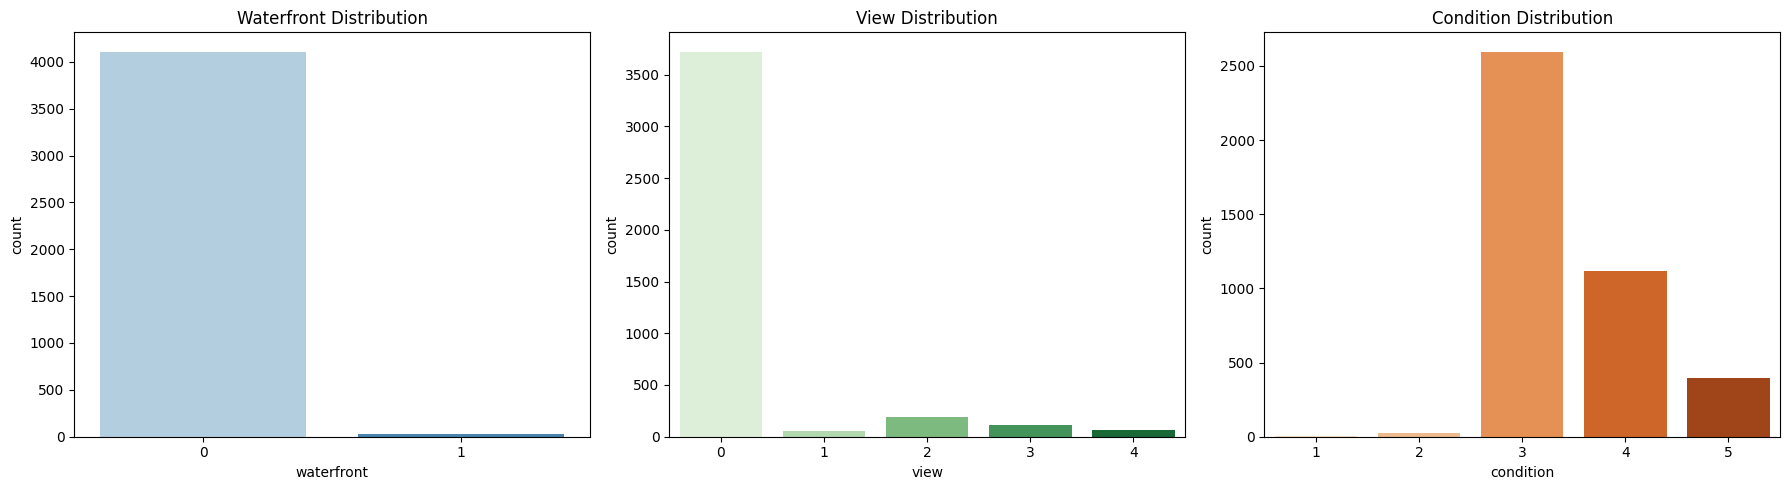

In [9]:
# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot for 'waterfront'
sns.countplot(x=df['waterfront'], ax=axes[0], palette='Blues')
axes[0].set_title('Waterfront Distribution')

# Plot for 'view'
sns.countplot(x=df['view'], ax=axes[1], palette='Greens')
axes[1].set_title('View Distribution')

# Plot for 'condition'
sns.countplot(x=df['condition'], ax=axes[2], palette='Oranges')
axes[2].set_title('Condition Distribution')

# Show the plot
plt.tight_layout()
plt.show()

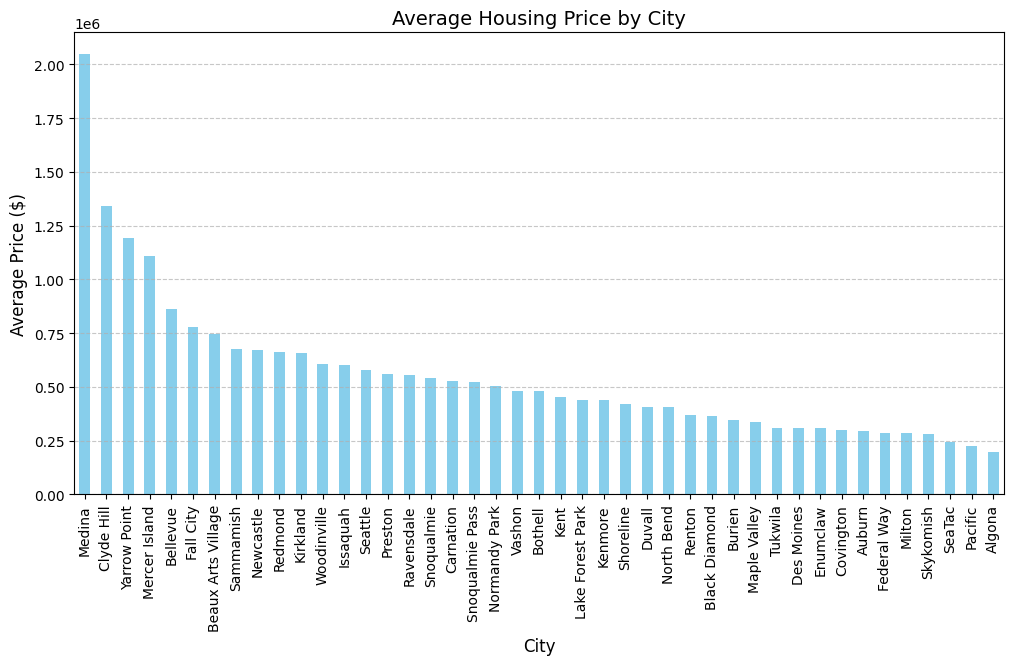

In [10]:
# Group by city and calculate the average price
avg_price_by_city = df.groupby("city")["price"].mean().sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(12, 6))
avg_price_by_city.plot(kind="bar", color="skyblue")

# Customize the chart
plt.title("Average Housing Price by City", fontsize=14)
plt.xlabel("City", fontsize=12)
plt.ylabel("Average Price ($)", fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


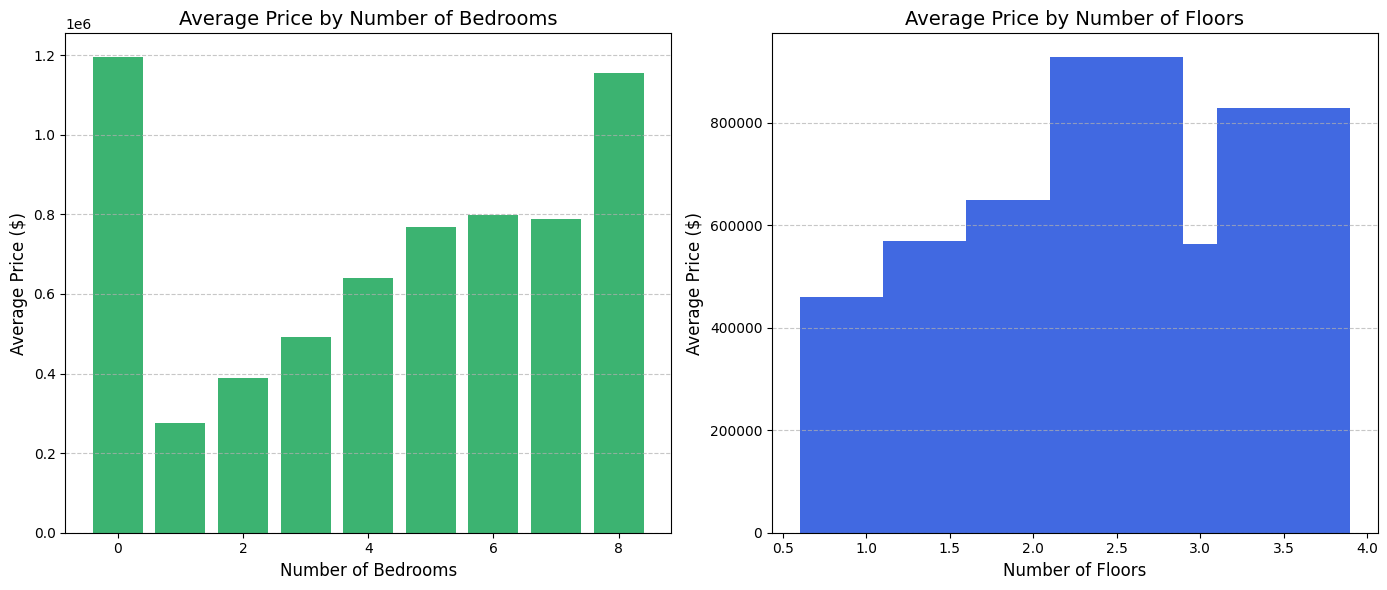

In [11]:
# Calculate average price by number of bedrooms
avg_price_by_bedrooms = df.groupby("bedrooms")["price"].mean().sort_index()

# Calculate average price by number of floors
avg_price_by_floors = df.groupby("floors")["price"].mean().sort_index()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot average price by number of bedrooms
axes[0].bar(avg_price_by_bedrooms.index, avg_price_by_bedrooms.values, color="mediumseagreen")
axes[0].set_title("Average Price by Number of Bedrooms", fontsize=14)
axes[0].set_xlabel("Number of Bedrooms", fontsize=12)
axes[0].set_ylabel("Average Price ($)", fontsize=12)
axes[0].grid(axis="y", linestyle="--", alpha=0.7)

# Plot average price by number of floors
axes[1].bar(avg_price_by_floors.index, avg_price_by_floors.values, color="royalblue")
axes[1].set_title("Average Price by Number of Floors", fontsize=14)
axes[1].set_xlabel("Number of Floors", fontsize=12)
axes[1].set_ylabel("Average Price ($)", fontsize=12)
axes[1].grid(axis="y", linestyle="--", alpha=0.7)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


Now it's time to do analysis and split the data to perform ML Algorithms

In [12]:
#drop irrelevant columns
df = df.drop(columns=['date','country', 'statezip', 'street'])

In [13]:
#Convert categorical columns into numerical by OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
X_cat = pd.DataFrame(encoder.fit_transform(df[['city']]), columns=encoder.get_feature_names_out(['city']))
df = df.drop(columns=['city'])
df = pd.concat([df, X_cat], axis=1)

In [14]:
#Split the data into X and y
X = df.drop(columns=['price'])
y = df['price']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Import Linear Regression and Random Forest Regressor to analyze the model and make predictions

In [17]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [18]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [19]:
def evaluate_model(y_test, y_pred, model_name):
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} Performance:")
    print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, R2 Score: {r2:.2f}\n")

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")

Linear Regression Performance:
MAE: 136840.50, RMSE: 234071.74, R2 Score: 0.48

Random Forest Performance:
MAE: 130762.63, RMSE: 238834.73, R2 Score: 0.46



C:\Users\DELL\Documents\Power BI Desktop\Custom Connectors\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\DELL\Documents\Power BI Desktop\Custom Connectors\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


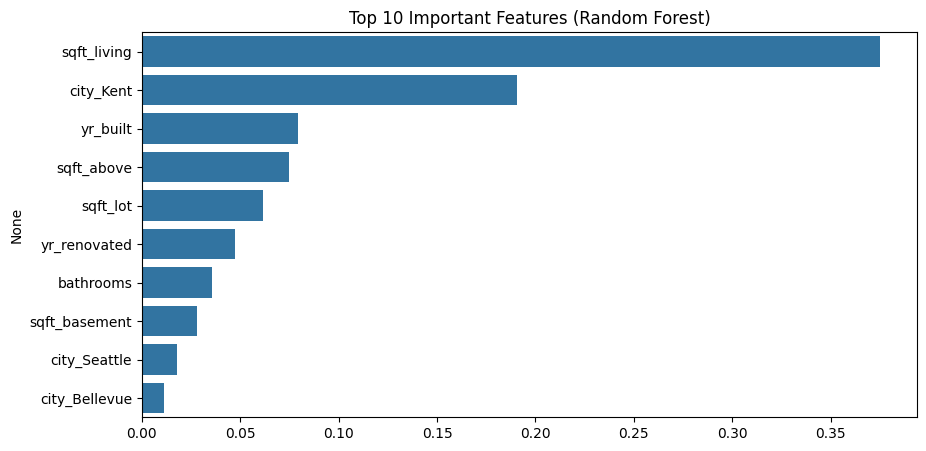

In [20]:
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance.values[:10], y=feature_importance.index[:10])
plt.title("Top 10 Important Features (Random Forest)")
plt.show()